pip install rioxarray

In [2]:
import rioxarray

In [3]:
surface = rioxarray.open_rasterio('../data/ilha_maranhao_2022.tif')
surface

<xarray.DataArray (band: 1, y: 1470, x: 1452)> Size: 2MB
[2134440 values with dtype=uint8]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 12kB -44.41 -44.41 -44.41 ... -44.02 -44.02 -44.02
  * y            (y) float64 12kB -2.403 -2.403 -2.404 ... -2.799 -2.799 -2.799
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      classification_2022

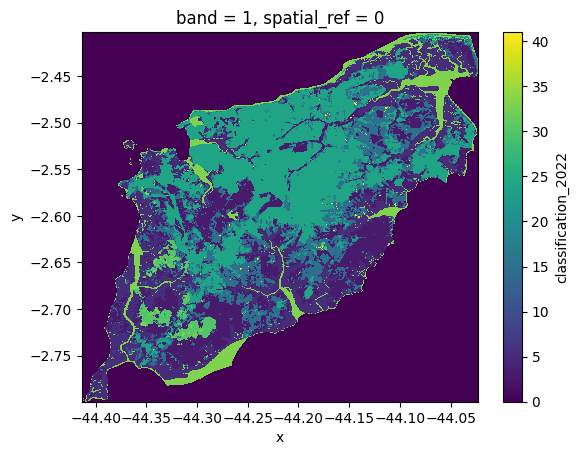

In [4]:
surface.plot()

In [5]:
surface.to_series()

band  y          x         
1     -2.403218  -44.413651    0
                 -44.413381    0
                 -44.413112    0
                 -44.412842    0
                 -44.412573    0
                              ..
      -2.799106  -44.023692    0
                 -44.023423    0
                 -44.023153    0
                 -44.022884    0
                 -44.022614    0
Length: 2134440, dtype: uint8

In [6]:
# Verificar os valores únicos no raster (opcional, para inspeção)
valores_unicos = surface.values.flatten()
print(f"Valores únicos no raster: {set(valores_unicos)}")

Valores únicos no raster: {np.uint8(0), np.uint8(33), np.uint8(32), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(39), np.uint8(41), np.uint8(11), np.uint8(12), np.uint8(15), np.uint8(23), np.uint8(24), np.uint8(25), np.uint8(30)}


In [7]:
# Criar o mapa binário: 1 para valor 24 (áreas urbanas), 0 para os demais
raster_binario = (surface == 24).astype(int)

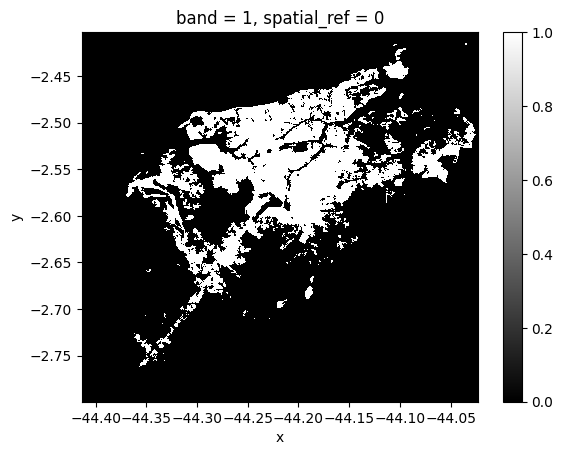

In [8]:
# Plotar o mapa binário
raster_binario.plot(cmap="gray")

In [9]:
raster_binario

<xarray.DataArray (band: 1, y: 1470, x: 1452)> Size: 17MB
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 12kB -44.41 -44.41 -44.41 ... -44.02 -44.02 -44.02
  * y            (y) float64 12kB -2.403 -2.403 -2.404 ... -2.799 -2.799 -2.799
    spatial_ref  int64 8B 0

In [16]:
# Converter os dados do raster binário para numpy (primeira banda)
binario_numpy = raster_binario.values[0].astype("uint8")  # Converter explicitamente para uint8


In [17]:
# Obter a transformação espacial do raster binário
transform = raster_binario.rio.transform()

In [12]:
from rasterio.features import shapes

In [18]:
binario_numpy

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [19]:
geometries = list(
    shapes(binario_numpy, mask=(binario_numpy == 1), transform=transform)
)

In [27]:
len(geometries)

388

In [22]:
import geopandas as gpd

In [30]:
import pandas as pd

In [32]:
df = pd.DataFrame ([{'geometry': geom, 'value': value} for geom, value in geometries if value == 1])

In [ ]:
gpd.GeoDataFrame(df,geometry='geometry', crs=raster_binario.rio.crs)

In [ ]:
# Criar um GeoDataFrame com os polígonos
gdf = gpd.GeoDataFrame.from_features(
    [{'geometry': geom, 'value': value} for geom, value in geometries if value == 1],
    crs=raster_binario.rio.crs
)

KeyError: 'properties'